In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import fastai
from fastai.vision import * #importing libraries
from fastai.metrics import error_rate

import cv2
import time
from ipywidgets import widgets
import numpy
from twilio.rest import Client

In [ ]:
!pip install twilio

     |████████████████████████████████| 481kB 17.2MB/s 
  Created wheel for twilio: filename=twilio-6.54.0-py2.py3-none-any.whl size=1251893 sha256=c64f312c5e159a59d0cb7b4df36083cb568da57456084ef55f5a9fdba3818578
  Stored in directory: /root/.cache/pip/wheels/bd/0b/c7/64cdbbdd6933050976d2c49e3a47289e924ff44c0c538247c3
Successfully built twilio


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset'
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=244, bs=16, valid_pct=0.3).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.load('violence_2019')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

Learner(data=ImageDataBunch;

Train: LabelList (729 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
Non-Violence,Non-Violence,Non-Violence,Non-Violence,Non-Violence
Path: /content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset;

Valid: LabelList (312 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
Violence,Violence,Violence,Violence,Non-Violence
Path: /content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, cei

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Real Time Violence Detection

<IPython.core.display.Javascript object>

Saved to photo.jpg


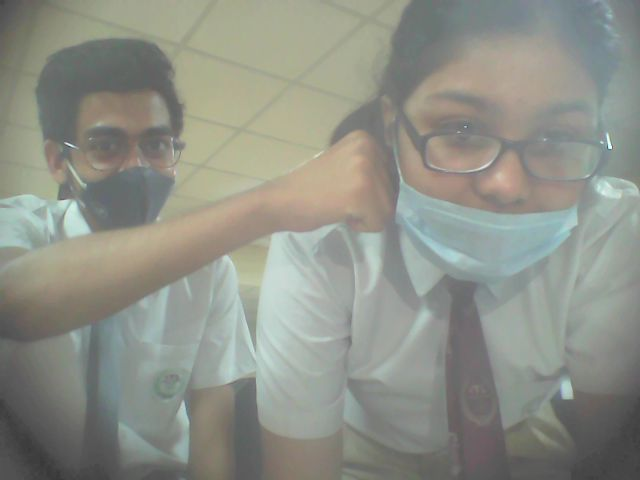

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))


  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from ipywidgets import interact, interact_manual, fixed
#predict = widgets.Button(description="predict")
#display(predict)
def predict():
  img = open_image('photo.jpg')
  pred_class,pred_idx,outputs = learn.predict(img)
  #learn.predict(img)
  img.show()
  print ( pred_class, "Detected")
  if outputs[1]>0.5:
    account_sid = 'add_id_here'
    auth_token = 'add_token_here'
    client = Client(account_sid, auth_token)
    client.messages.create(to="add_number_here",
                         from_="+12055189523",
                         body="Violence Detected")
    print("SMS sent")


interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<function __main__.predict>

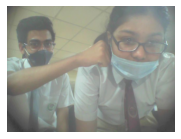

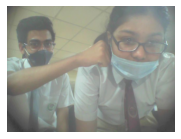

In [ ]:
interact_manual(predict)

Some Other Examples

Detected Violence


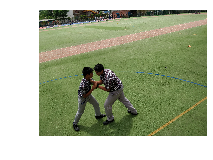

In [ ]:
img = open_image('/content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset/Violence/Copy of IMG_20190809_112639_017.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("Detected", pred_class)


Detected Non-Violence


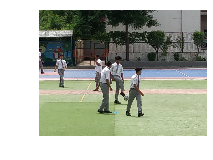

In [ ]:
img = open_image('/content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset/Non-Violence/Copy of IMG_20190809_105422.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("Detected", pred_class)

Detected Violence


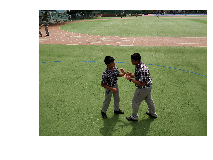

In [ ]:
img = open_image('/content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset/Violence/Copy of IMG_20190809_112636_020.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("Detected", pred_class)

Detected Violence


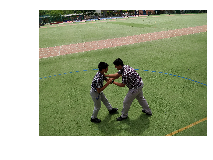

In [ ]:
img = open_image('/content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset/Violence/Copy of IMG_20190809_112639_010.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("Detected", pred_class)

Detected Non-Violence


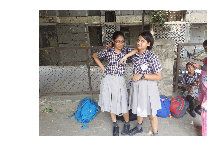

In [ ]:
img = open_image('/content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset/Non-Violence/20190909_141332.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("Detected", pred_class)

Detected Non-Violence


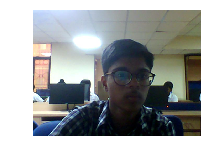

In [ ]:
img = open_image('photo.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("Detected", pred_class)